In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



In [2]:
df = pd.read_csv(r'C:\Users\ashmi\OneDrive\Desktop\Data Science\Data_Science_Class\Pandas\csv_data\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In dataset Total 891 rows and 12 columns.
* PassengerId,Survived,Pclass,Name,Sex,Sibsp,Parch,Ticket,Fare has no not null values.
* Age has 714 not-null values.
* Cabin has 204 not-null values.
* Embarked has 889 not-null values.

In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Handling missing values

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

* Age contain 20% null values.
* Cabin contain 77% null values.
* Embarked contain 0.02% null values.

<Axes: >

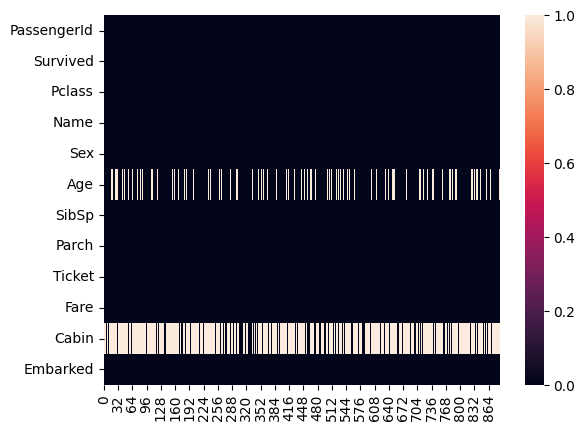

In [7]:
sns.heatmap(df.isna().T)

* If dataset contain more than 70% null values then we drop the columns.
* If dataset contain 5% null values then we drop the specific rows.

So we drop the cabin column because this column contain 77% data missing.

In [8]:
# drop the cabin columns
df.drop(columns='Cabin',inplace=True)

In [9]:
# drop the null rows
df.dropna(subset=['Embarked'],inplace=True)

### Is affect or not Age column to pclass

<Axes: xlabel='Pclass', ylabel='Age'>

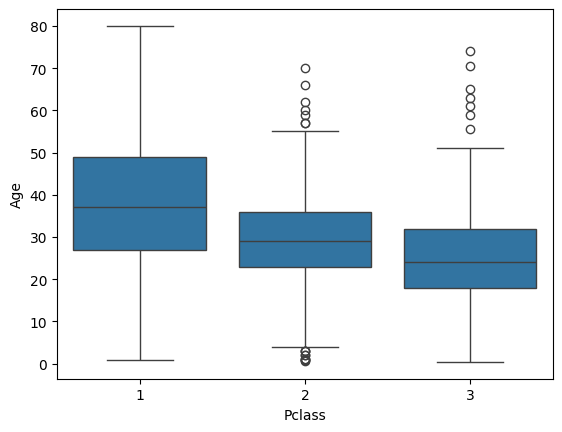

In [10]:
sns.boxplot(x='Pclass',y = 'Age',data=df)

* The boxplot show the Age affect the Pclass so we use the median because pclass contain the outlier.

In [11]:
df.groupby(['Pclass']).Age.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [12]:
# write the function to fell the Age with pclass wise.
def fill_age(col):
    age = col.iloc[0]
    pclass = col.iloc[1]
    if pd.isna(age) and pclass == 1:
        return 37
    elif pd.isna(age) and pclass == 2:
        return 29
    elif pd.isna(age) and pclass == 3:
        return 24
    else:
        return age
    

In [13]:
# Apply the function to the dataset
df['Age']=df[['Age','Pclass']].apply(fill_age,axis='columns')

In [14]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### EDA

<Axes: xlabel='Survived', ylabel='count'>

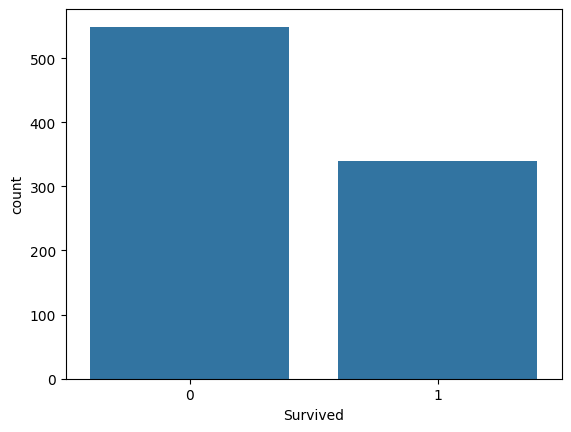

In [15]:
sns.countplot(x = 'Survived',data=df)

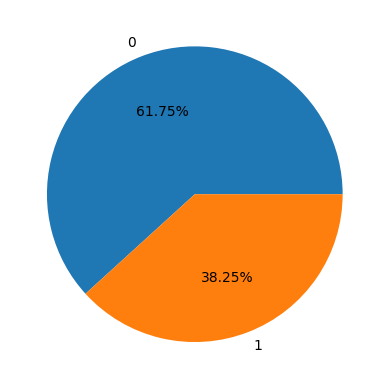

In [16]:
s = df['Survived'].value_counts()
plt.pie(x = s.values,labels=s.index,autopct='%.2f%%')
plt.show()

The piechat shows the,

* Target variable are imbalanced where as class 0 contain 61.75% and class 1 contain 38.25% dataset.

If data is imbalance we use Oversampling and Undersampling technique to balace the data, or use SMOTE technique. If the data is imbalance accuracy mightnot be a good metic.

* Undersampling :  To remove the sample to equal the majority data.

* Oversampling : Duplicate the sample to eqaul the minority data.


<Axes: >

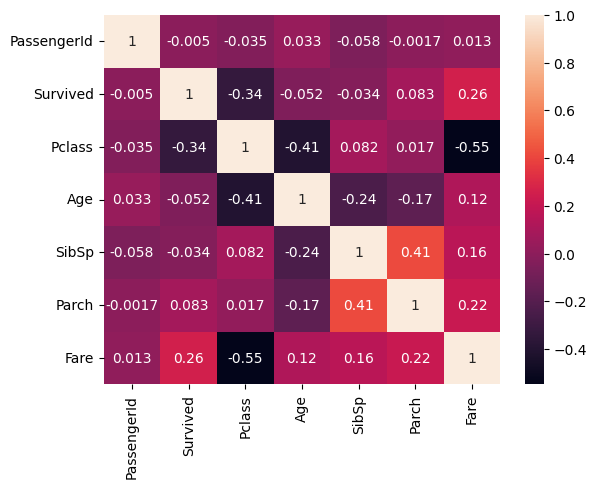

In [17]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Survived', ylabel='Age'>

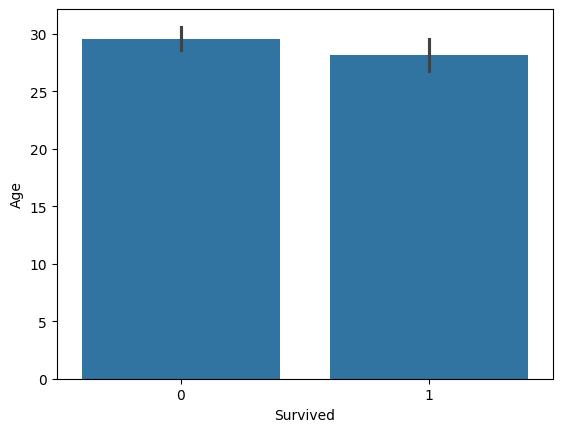

In [18]:
# check the Age affect or not the survived .
sns.barplot(x = df['Survived'],y = df['Age'])

<Axes: xlabel='Survived', ylabel='count'>

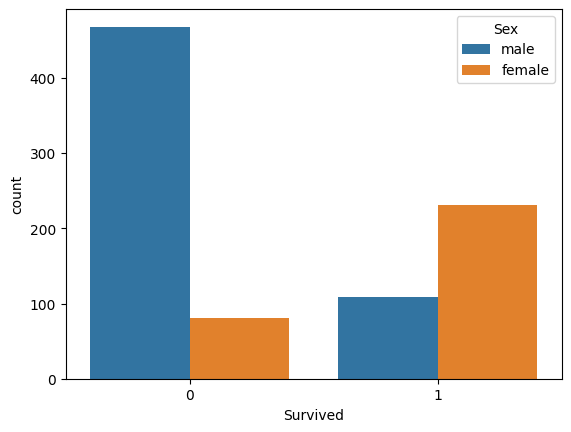

In [19]:
# check the realtion of sex and target variable
sns.countplot(x = df['Survived'],hue='Sex',data=df)

The countplot shows,

* Most Male died as compare to survived.
* Mose Female survived as compare to died.

<Axes: xlabel='Survived', ylabel='Parch'>

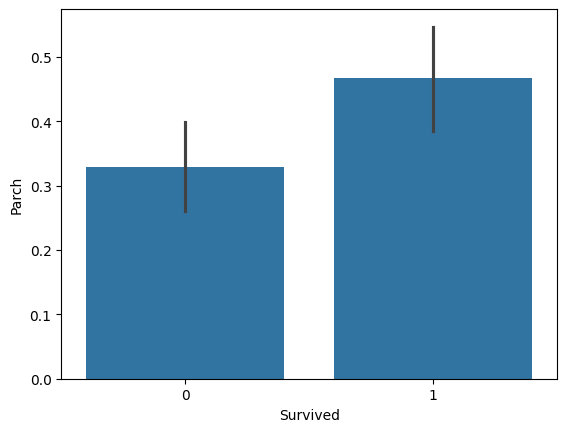

In [20]:
sns.barplot(x = df['Survived'],y = df['Parch'])

<Axes: xlabel='Survived', ylabel='Fare'>

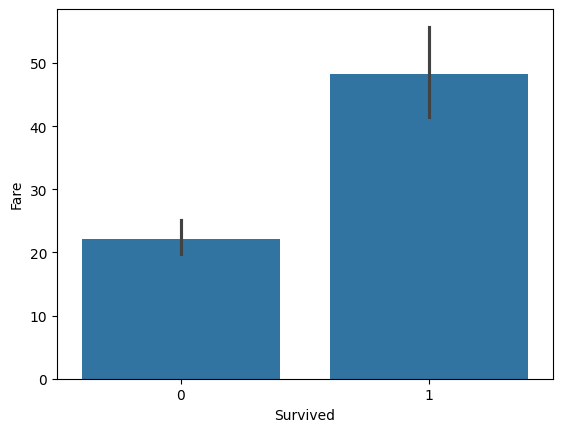

In [21]:
sns.barplot(x = df['Survived'],y = df['Fare'])

<Axes: xlabel='Survived', ylabel='SibSp'>

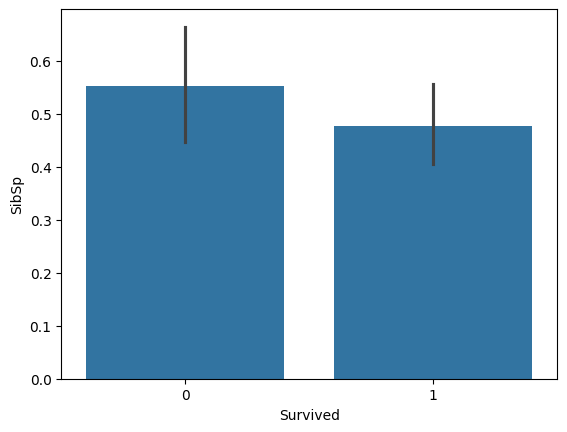

In [22]:
sns.barplot(x = df['Survived'],y = df['SibSp'])

### Delete the irrelative features

In [23]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
# df.drop(columns=['SibSp','Parch','Embarked'],inplace=True)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Feature Selecting

In [25]:
X = df.iloc[:,1:]
y = df.Survived

In [26]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [27]:
X = pd.get_dummies(columns=['Sex','Embarked'],drop_first=True,data=X)
X.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [30]:
y_pred = model.predict(X_test)

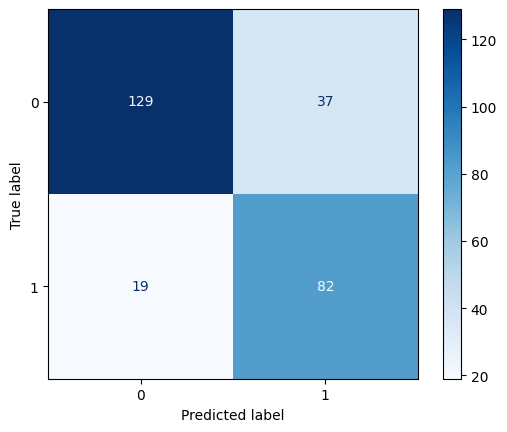

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,f1_score,accuracy_score

ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap = 'Blues')

In [32]:
accuracy_score(y_test,y_pred)

0.7902621722846442

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_model =  RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_predr = rf_model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_predr)
print("Accuracy:", accuracy)

Accuracy: 0.8089887640449438
